#### 2109106107
#### Grace Ligit Nuh
#### POSTTEST 6

Import Library

In [191]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from sklearn.preprocessing import OneHotEncoder

Link Dataset

https://drive.google.com/file/d/1D5L3P2ASGCJA_vq-n9WJ_ygbesnxRHYC/view?usp=sharing

Membaca dataset

In [192]:
dataset = pd.read_csv('adult.csv')
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Dataset terlalu besar dan pemrosesan lama, jadi dipangkas menjadi 5000 baris secara acak

In [193]:
n = 5000
if len(dataset) > n:
    random_indices = np.random.choice(len(dataset), n, replace=False)
    dataset = dataset.iloc[random_indices]

dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
43037,31,Local-gov,192565,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,90,United-States,>50K
30062,39,Private,98941,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,>50K
35136,25,Local-gov,206002,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
8459,43,Federal-gov,265604,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
46136,61,Local-gov,248595,1st-4th,2,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47730,39,Private,293291,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,>50K
41918,29,Self-emp-inc,168221,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1740,70,United-States,<=50K
12471,36,Private,224541,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,El-Salvador,<=50K
28754,25,Private,138765,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K


Memisahkan fitur dan target


In [194]:
X = dataset.drop('income', axis=1) 
y = dataset['income']

Menggunakan label encoding untuk mengubah variabel target "income" menjadi 1 dan 0


In [195]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Split dataset menjadi train dan test

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Memisahkan kolom-kolom numerik dan kategorikal

In [197]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

Menggunakan OneHotEncoder dengan handle_unknown='ignore' pada kolom kategorikal

In [198]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Mengkodekan kolom data kategorikal pada X_train dan X_test

In [199]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

Mengonversi seluruh dataset (fitur dan target) ke float32

In [200]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

Membuat Sequential model 

In [201]:
model = Sequential()
model.add(Dense(32, input_dim=100, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [202]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                3232      
                                                                 
 dense_40 (Dense)            (None, 8)                 264       
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3505 (13.69 KB)
Trainable params: 3505 (13.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Mengompilasi model

In [203]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [204]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
            self.model.stop_training = True

Melatih model

In [205]:
kolbek = MyCallback()
history = model.fit(
        X_train_encoded, 
        y_train, 
        epochs=10, 
        batch_size=64, 
        validation_data=(X_test_encoded, y_test),
        callbacks=[kolbek]
    )

Epoch 1/10
63/63 [==============================] - 1s 7ms/step - loss: 0.5090 - accuracy: 0.7545 - val_loss: 0.4314 - val_accuracy: 0.7670
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.8165 - val_loss: 0.3864 - val_accuracy: 0.8290
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3676 - accuracy: 0.8335 - val_loss: 0.3759 - val_accuracy: 0.8270
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.8378 - val_loss: 0.3720 - val_accuracy: 0.8380
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8422 - val_loss: 0.3706 - val_accuracy: 0.8360
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.3479 - accuracy: 0.8425 - val_loss: 0.3702 - val_accuracy: 0.8350
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.8450 - val_loss: 0.3689 - val_accuracy: 0.8360
Epoch 8/10
63/63 [==

Evaluasi model

In [206]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8410
Test loss: 0.36938774585723877
Test accuracy: 0.8410000205039978


Menampilkan grafik model loss dan model accuracy, baik pada training maupun validation

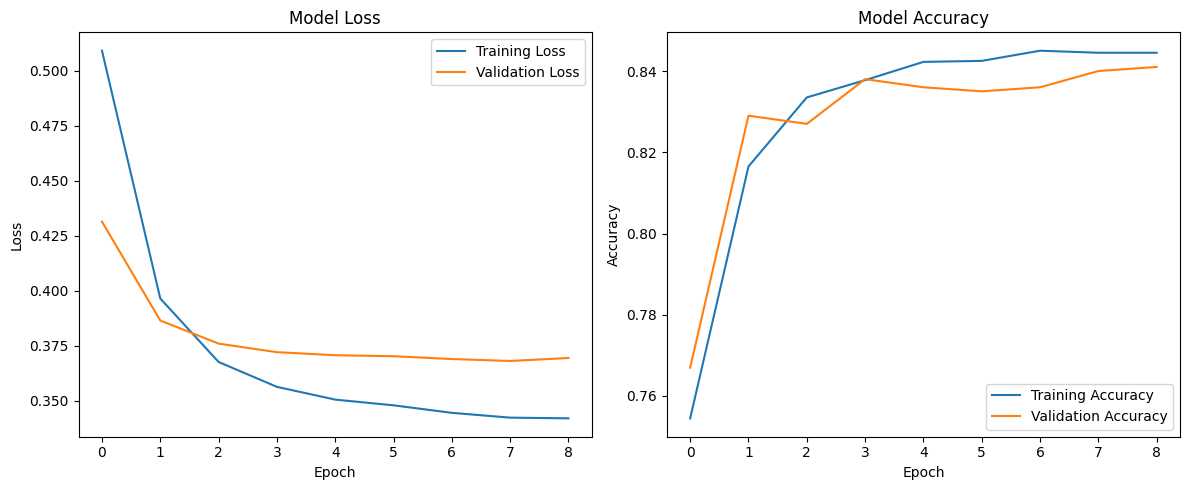

In [207]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()
